<a href="https://colab.research.google.com/github/joeyee614/capitalmanagement/blob/main/Capital_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import time
import numpy as np
import pandas as pd
import datetime as dt
import cufflinks as cf
from pylab import mpl, plt

In [ ]:
np.random.seed(1000)
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

<ipython-input-3-56c54275095e>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



**Capital Management**

Kelly Cirterion in a Binomial Setting

In [ ]:
p = 0.55

In [ ]:
f = p - (1 - p)

In [ ]:
f

0.10000000000000009

In [ ]:
I = 50

In [ ]:
n = 100

In [ ]:
def run_simulation(f):
    c = np.zeros((n, I))
    c[0] = 100
    for i in range(I):
        for t in range(1, n):
            o = np.random.binomial(1, p)
            if o > 0:
               c[t, i] = (1 + f) * c[t - 1, i]
            else:
               c[t, i] = (1 - f) * c[t - 1, i]
    return c

In [ ]:
c_1 = run_simulation(f)

In [ ]:
c_1.round(2)

array([[100.  , 100.  , 100.  , ..., 100.  , 100.  , 100.  ],
       [ 90.  , 110.  ,  90.  , ..., 110.  ,  90.  , 110.  ],
       [ 99.  , 121.  ,  99.  , ..., 121.  ,  81.  , 121.  ],
       ...,
       [226.35, 338.13, 413.27, ..., 123.97, 123.97, 123.97],
       [248.99, 371.94, 454.6 , ..., 136.37, 136.37, 136.37],
       [273.89, 409.14, 409.14, ..., 122.73, 150.01, 122.73]])

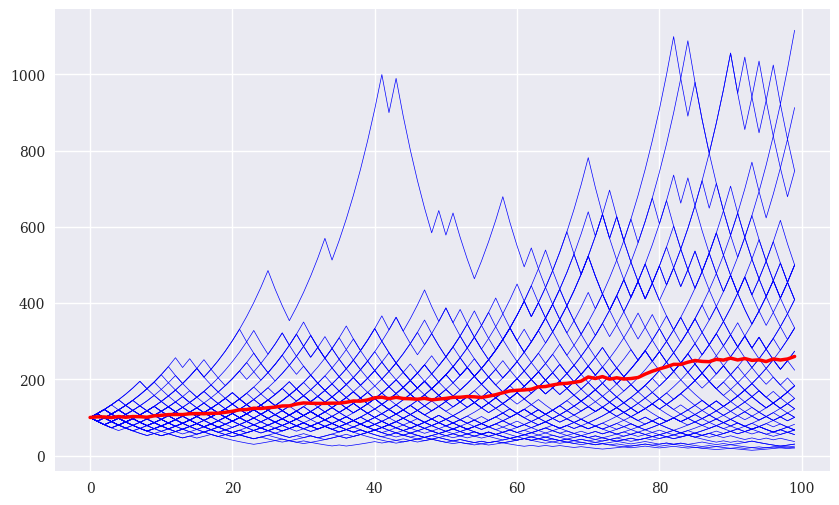

In [ ]:
plt.figure(figsize =(10, 6))
plt.plot(c_1, 'b', lw=0.5)
plt.plot(c_1.mean(axis=1), 'r', lw=2.5);

In [ ]:
c_2 = run_simulation(0.05)

In [ ]:
c_3 = run_simulation(0.25)

In [ ]:
c_4 = run_simulation(0.5)

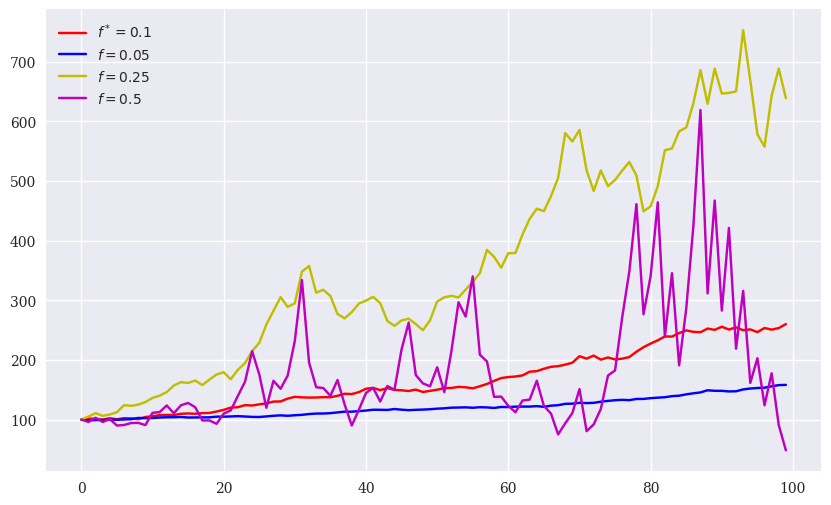

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(c_1.mean(axis=1), 'r', label='$f^*=0.1$')
plt.plot(c_2.mean(axis=1), 'b', label='$f=0.05$')
plt.plot(c_3.mean(axis=1), 'y', label='$f=0.25$')
plt.plot(c_4.mean(axis=1), 'm', label='$f=0.5$')
plt.legend(loc=0);

Kelly Criterion for Stocks and Indices

In [ ]:
from google.colab  import files
uploaded = files.upload()

Saving tr_eikon_eod_data.csv to tr_eikon_eod_data.csv


In [ ]:
raw = pd.read_csv('tr_eikon_eod_data.csv')

In [ ]:
symbol = '.SPX'

In [ ]:
data = pd.DataFrame(raw[symbol])

In [ ]:
data['returns'] = np.log(data / data.shift(1))

In [ ]:
data.dropna(inplace =True)

In [ ]:
data.tail()

,.SPX,returns
2211,2717.07,-0.013820
2212,2723.06,0.002202
2213,2699.63,-0.008642
2214,2716.31,0.006160
2215,2718.37,0.000758


In [ ]:
data.head()

,.SPX,returns
2,1136.52,0.003111
3,1137.14,0.000545
4,1141.69,0.003993
5,1144.98,0.002878
6,1146.98,0.001745


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 2 to 2215
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   .SPX     2061 non-null   float64
 1   returns  2061 non-null   float64
dtypes: float64(2)
memory usage: 48.3 KB


In [ ]:
data.describe().round(2)

,.SPX,returns
count,2061.00,2061.00
mean,1802.78,0.00
std,483.35,0.01
min,1022.58,-0.07
25%,1338.35,-0.00
50%,1863.40,0.00
75%,2109.60,0.00
max,2872.87,0.05


In [ ]:
mu = data.returns.mean() * 252

In [ ]:
mu

0.09898579893004976

In [ ]:
sigma = data.returns.std() * 252 ** 0.5

In [ ]:
sigma

0.1488567510081967

In [ ]:
r = 0.0           #riskrate

In [ ]:
f = (mu - r) / sigma ** 2

In [ ]:
f

4.4672043679706865

In [ ]:
equs = []

In [ ]:
def kelly_strategy(f):
    global equs
    equ = 'equity_{:.2f}'.format(f)
    equs.append(equ)
    cap = 'capital_{:.2f}'.format(f)
    data[equ] = 1          #equity
    data[cap] = data[equ] * f
    for i, t in enumerate(data.index[1:]):
        t_1 = data.index[i]
        data.loc[t, cap] = data[cap].loc[t_1] * \
                            math.exp(data['returns'].loc[t])
        data.loc[t, equ] = data[cap].loc[t] - \
                            data[cap].loc[t_1] + \
                            data[equ].loc[t_1]
        data.loc[t, cap] = data[equ].loc[t] * f

In [ ]:
kelly_strategy(f * 0.5)

In [ ]:
kelly_strategy(f * 0.66)

In [ ]:
kelly_strategy(f)

In [ ]:
print(data[equs].tail())

      equity_2.23  equity_2.95  equity_4.47
2211     4.707070     6.367340     8.794342
2212     4.730248     6.408727     8.880952
2213     4.639340     6.246147     8.539593
2214     4.703365     6.359932     8.775296
2215     4.711332     6.374152     8.805026


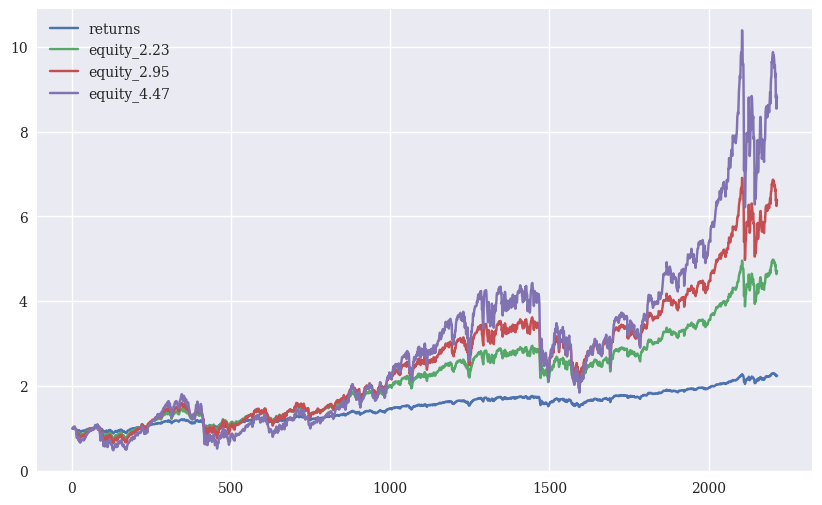

In [ ]:
ax = data['returns'].cumsum().apply(np.exp).plot(legend=True, figsize=(10,6))
data[equs].plot(ax=ax, legend=True);